# KEY WORD ANALYSIS

In this notebook, we are gonna extract the most frequently ocurring words in the reviews and determine the sentiment of each one. After, we are going to analyze how frequently each word appears in positive, negative and neutral reviews obtained from Vader.

In [76]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
from datetime import date
import matplotlib.pyplot as plt
from collections import Counter
import re

# Reading
Avengers_reviews = pd.read_csv('combined_datasets_sentiment.csv')

## Extracting Keywords

Lets extract the words more used in the reviews. In this case, we will showcase the top 10.

        Word  Frequency
0      movie       8945
1       film       4630
2    avenger       3452
3  character       3041
4     marvel       2787
5       time       2191
6       like       2056
7     ultron       1773
8     action       1762
9       good       1707


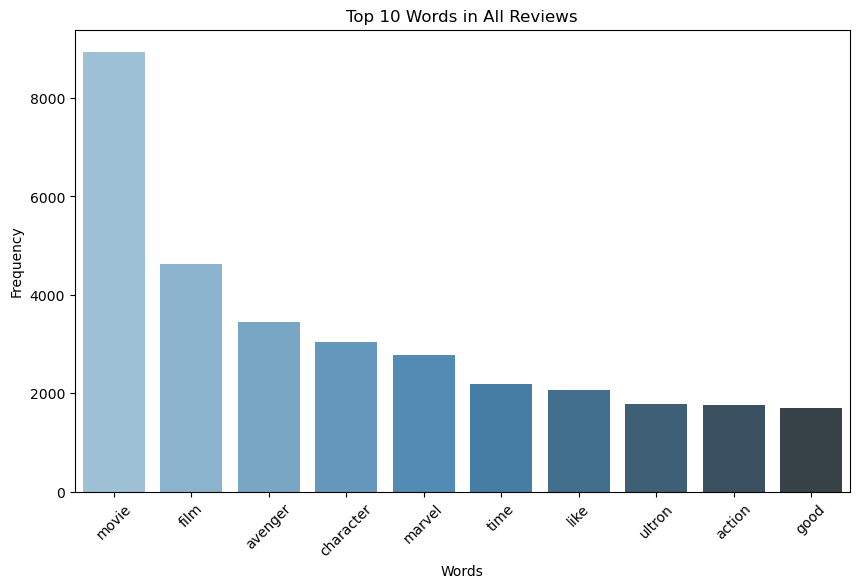

In [79]:
from sklearn.feature_extraction.text import CountVectorizer


# Function to get the top N words in a corpus
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

all_reviews = Avengers_reviews['content_cleaned'] # Get the top 10 words in all reviews
top_words = get_top_n_words(all_reviews, n=10) # Get the top 10 words in all reviews
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency']) # Create DataFrame
print(top_words_df)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=top_words_df, palette='Blues_d')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top 10 Words in All Reviews')
plt.xticks(rotation=45)
plt.show()


In [80]:
# Create a dictionary to store the top words for each movie
top_words_data = []

# Loop through each movie and extract the top words
for movie in Avengers_reviews['movie'].unique():
    movie_reviews = Avengers_reviews[Avengers_reviews['movie'] == movie]['content_cleaned']
    top_words = get_top_n_words(movie_reviews, n=10)
    
    for word, freq in top_words:
        top_words_data.append({'Movie': movie, 'Word': word, 'Frequency': freq})

# Create DataFrame
top_words_df = pd.DataFrame(top_words_data)

# Display the DataFrame
print(top_words_df)

                      Movie       Word  Frequency
0             Avengers 2012      movie       1772
1             Avengers 2012       film        709
2             Avengers 2012     marvel        550
3             Avengers 2012    endgame        455
4             Avengers 2012       time        447
5             Avengers 2012    avenger        445
6             Avengers 2012  character        372
7             Avengers 2012   infinity        350
8             Avengers 2012       best        340
9             Avengers 2012       like        328
10  Avengers: Age of Ultron      movie       3113
11  Avengers: Age of Ultron       film       2042
12  Avengers: Age of Ultron    avenger       1981
13  Avengers: Age of Ultron     ultron       1746
14  Avengers: Age of Ultron  character       1442
15  Avengers: Age of Ultron     action        993
16  Avengers: Age of Ultron       like        982
17  Avengers: Age of Ultron     marvel        866
18  Avengers: Age of Ultron       time        821


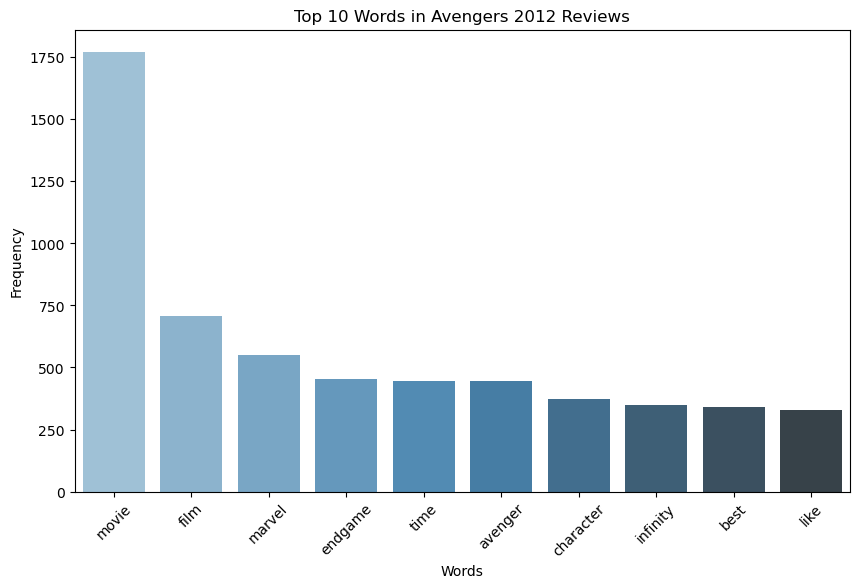

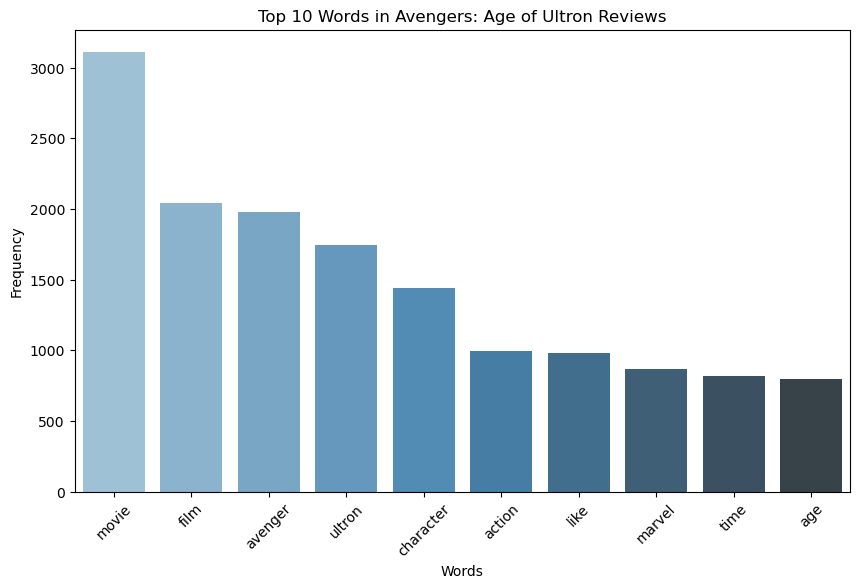

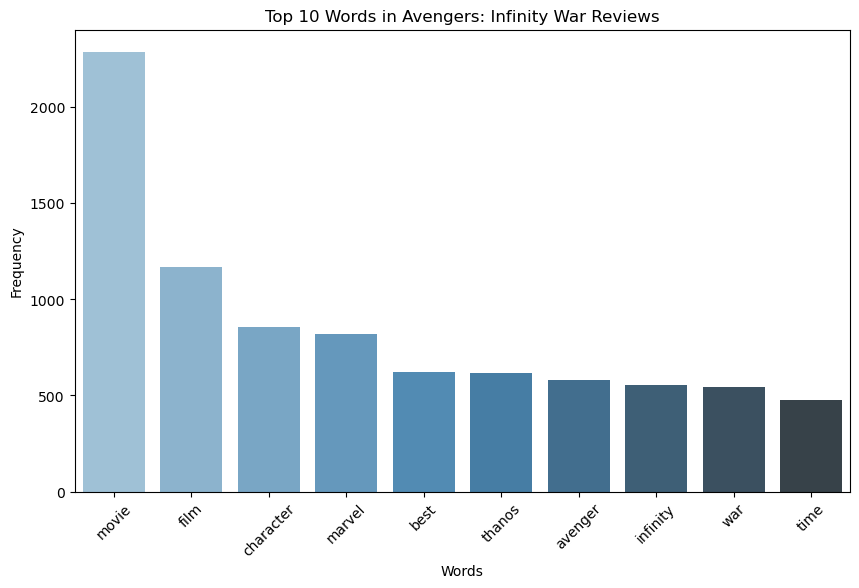

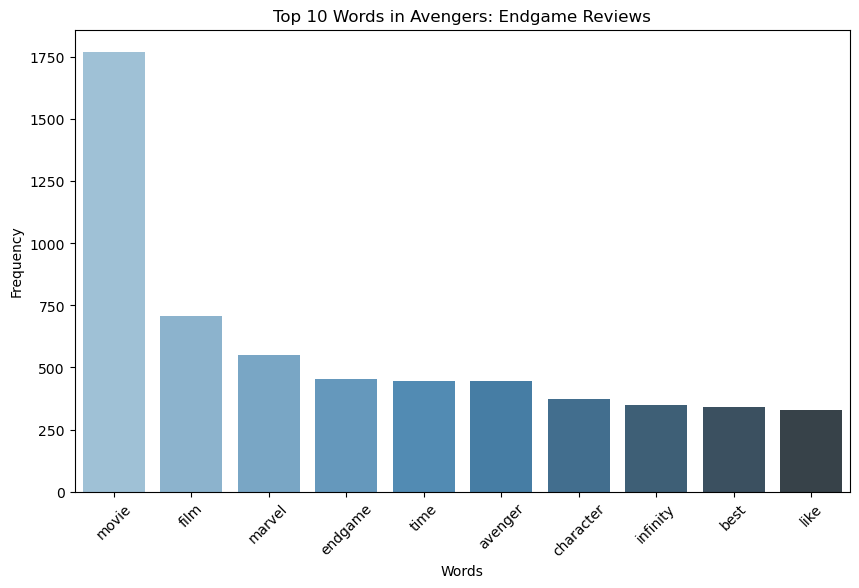

In [81]:
# Plotting
for movie in top_words_df['Movie'].unique():
    movie_df = top_words_df[top_words_df['Movie'] == movie]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Word', y='Frequency', data=movie_df, palette='Blues_d')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Words in {movie} Reviews')
    plt.xticks(rotation=45)
    plt.show()


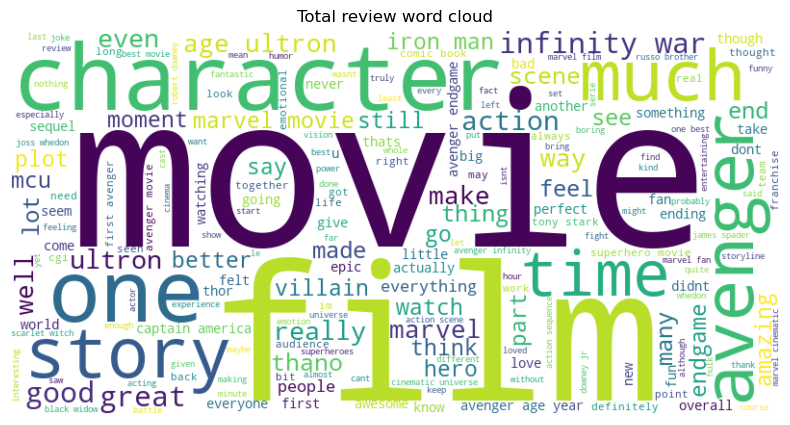

In [82]:
from wordcloud import WordCloud

# lets join all the clean reviews in a string
all_reviews = ' '.join(Avengers_reviews['content_cleaned'])

# Lets create a word cloud with all reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Show world cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Total review word cloud')
plt.show()

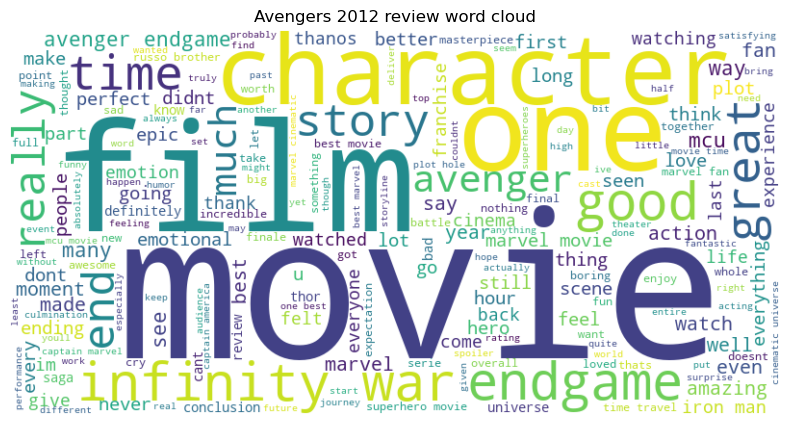

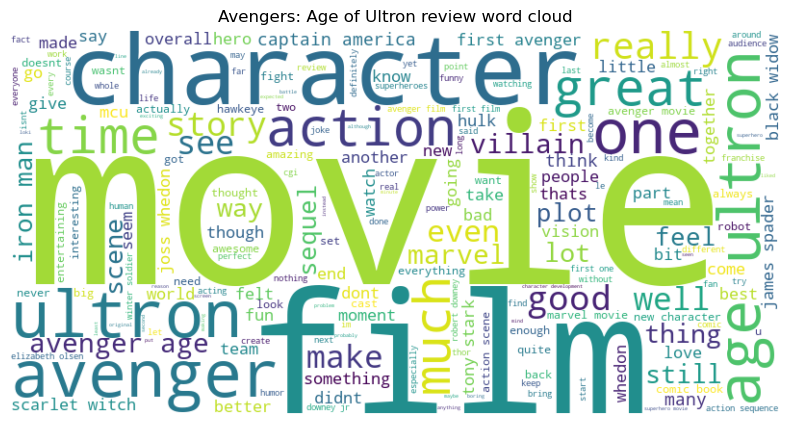

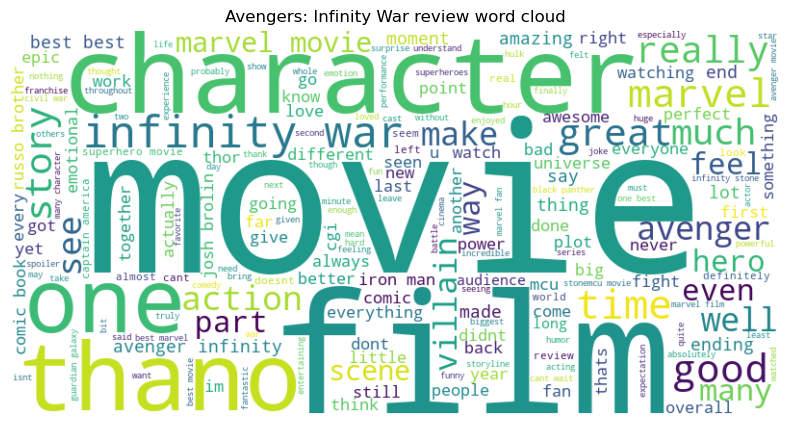

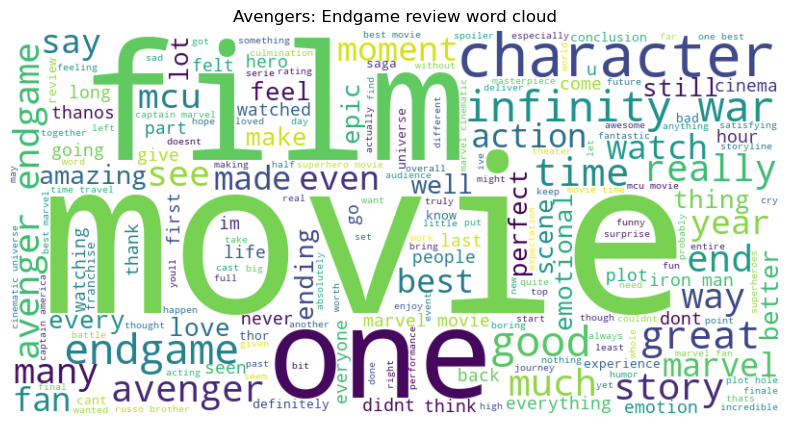

In [83]:

# Function to generate and display word cloud for each movie
def generate_word_clouds(df, text_column, title_column):
    unique_movies = df[title_column].unique()
    
    for movie in unique_movies:
        # Filter reviews for the current movie
        movie_reviews = df[df[title_column] == movie]
        
        # Join all clean reviews in a string
        all_reviews = ' '.join(movie_reviews[text_column])
        
        # Create a word cloud with the reviews
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
        
        # Show word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{movie} review word cloud')
        plt.show()

# Apply the function to the DataFrame
generate_word_clouds(Avengers_reviews, 'content_cleaned', 'movie')

## Sentiment Analysis and Top Words
We are going to compare the top words from each Vader sentiment. After that, we are going to observe how behaves in each movie.

Most common words with Positive reviews: [('movie', 7969), ('film', 4202), ('avenger', 3062), ('character', 2750), ('marvel', 2589), ('time', 1932), ('like', 1839), ('best', 1609), ('action', 1604), ('ultron', 1577)]


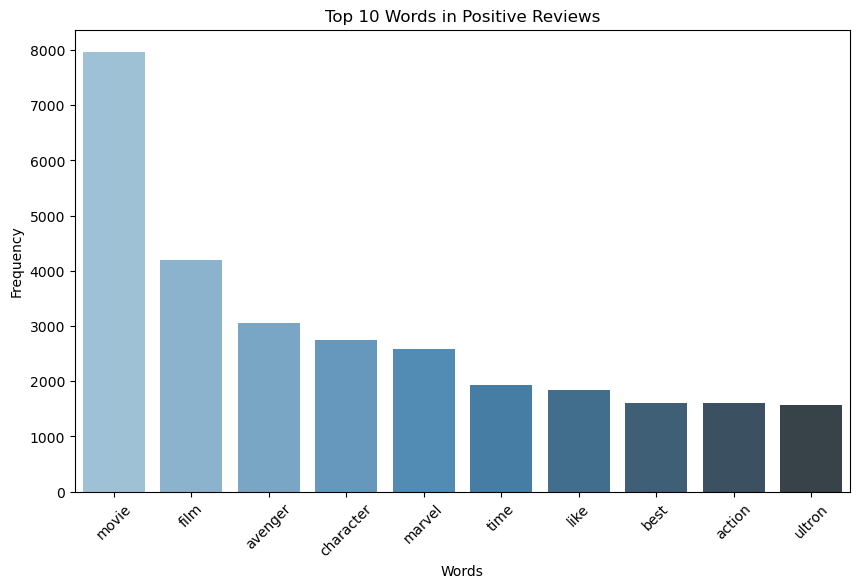

Most common words with Negative reviews: [('movie', 870), ('film', 397), ('avenger', 313), ('character', 270), ('war', 257), ('infinity', 231), ('time', 229), ('like', 200), ('marvel', 192), ('ultron', 158)]


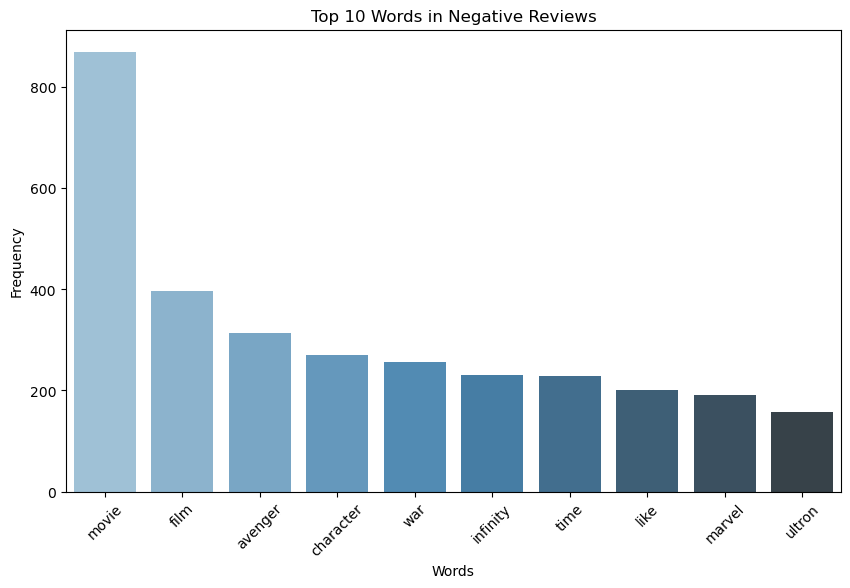

Most common words with Neutral reviews: [('movie', 106), ('avenger', 77), ('end', 45), ('age', 41), ('ultron', 38), ('film', 31), ('time', 30), ('watch', 26), ('endgame', 25), ('spoiler', 23)]


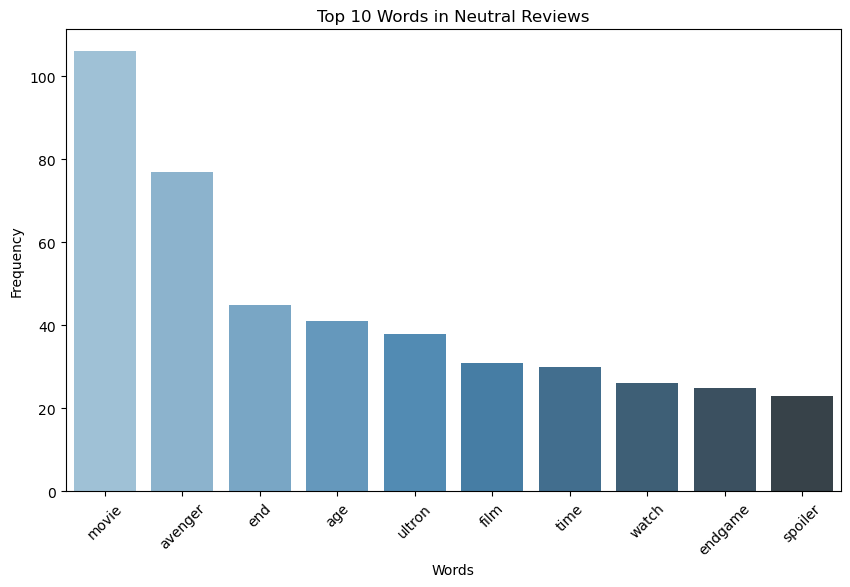

In [85]:
# Function to plot top N words for a given sentiment
def plot_top_words_by_sentiment(df, sentiment_class, sentiment_label):
    reviews = df[df['sentiment_class_vader'] == sentiment_class]['content_cleaned']
    common_words = get_top_n_words(reviews, n=10)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    
    print(f"Most common words with {sentiment_label} reviews:", common_words)

    #graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Word', y='Frequency', data=words_df, palette='Blues_d')
    plt.title(f'Top 10 Words in {sentiment_label} Reviews')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


# Plotting top words for each sentiment
plot_top_words_by_sentiment(Avengers_reviews, 'positive', 'Positive')
plot_top_words_by_sentiment(Avengers_reviews, 'negative', 'Negative')
plot_top_words_by_sentiment(Avengers_reviews, 'neutral', 'Neutral')

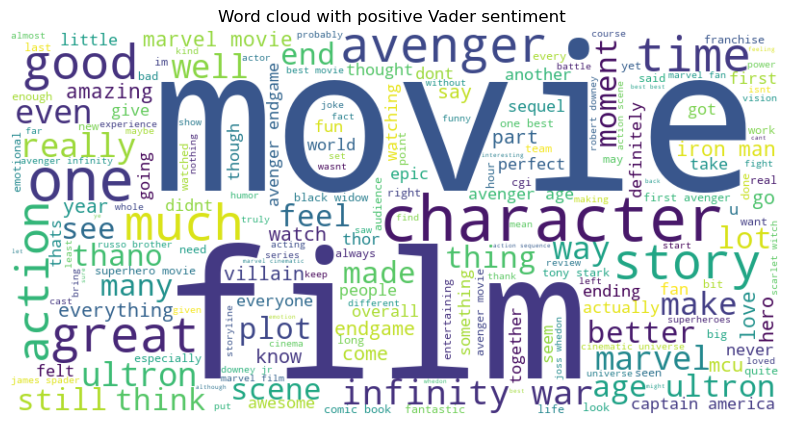

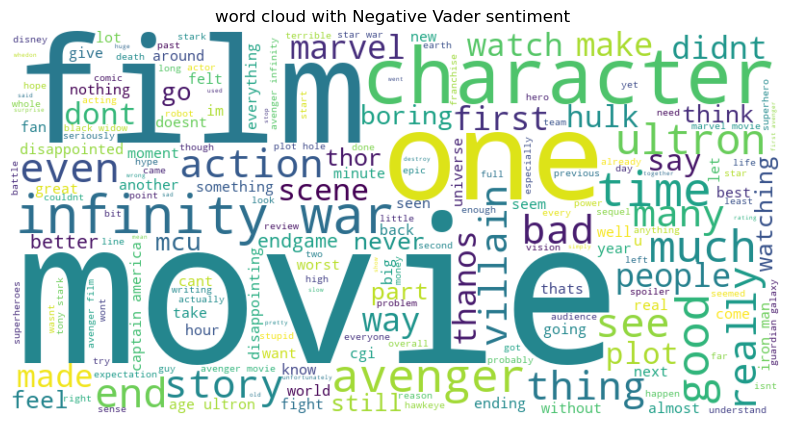

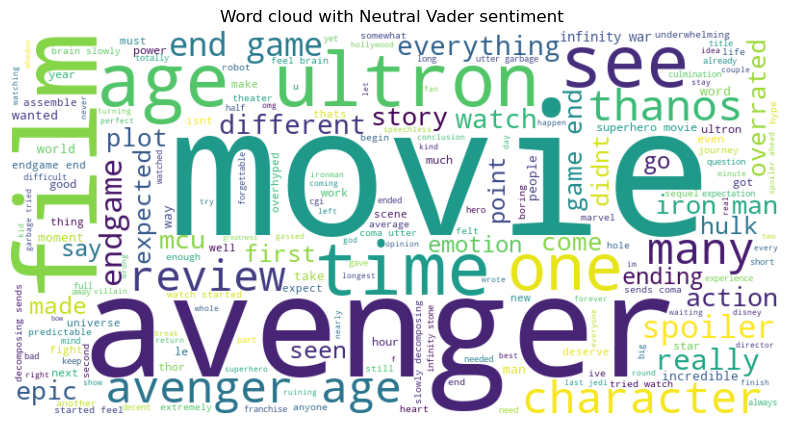

In [86]:
# Show word cloud with positive Vader sentiment 
positive_reviews = ' '.join(Avengers_reviews[Avengers_reviews['sentiment_class_vader'] == 'positive']['content_cleaned'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud with positive Vader sentiment ')
plt.show()

# Show word cloud with Negative Vader sentiment 
negative_reviews = ' '.join(Avengers_reviews[Avengers_reviews['sentiment_class_vader'] == 'negative']['content_cleaned'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('word cloud with Negative Vader sentiment ')
plt.show()

# Show word cloud with Neutral Vader sentiment 
neutral_reviews = ' '.join(Avengers_reviews[Avengers_reviews['sentiment_class_vader'] == 'neutral']['content_cleaned'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud with Neutral Vader sentiment ')
plt.show()

Lets see for each movie

Most common words in Avengers 2012 with Positive reviews: [('movie', 1599), ('film', 649), ('marvel', 519), ('endgame', 411), ('avenger', 408), ('time', 387), ('character', 340), ('best', 334), ('like', 296), ('infinity', 282)]


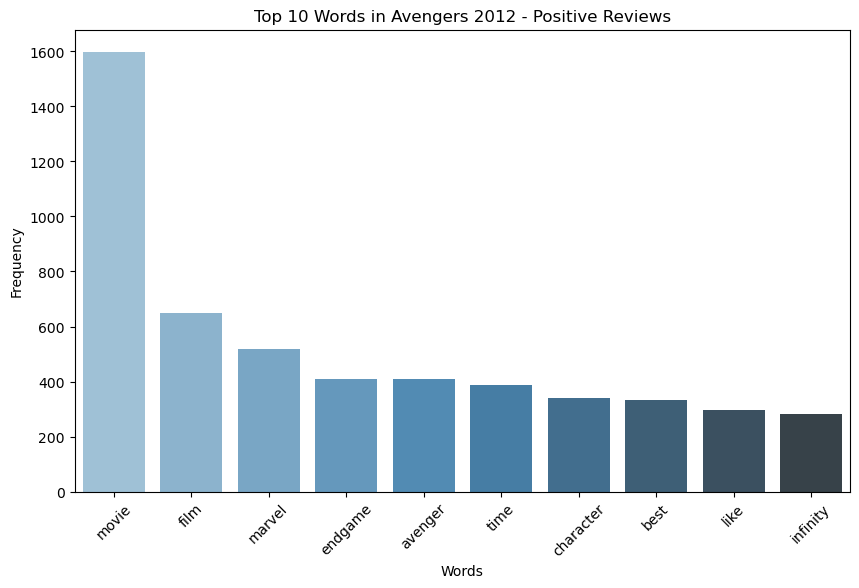

Most common words in Avengers 2012 with Negative reviews: [('movie', 151), ('war', 71), ('infinity', 64), ('time', 53), ('film', 52), ('endgame', 32), ('end', 31), ('marvel', 30), ('avenger', 30), ('like', 29)]


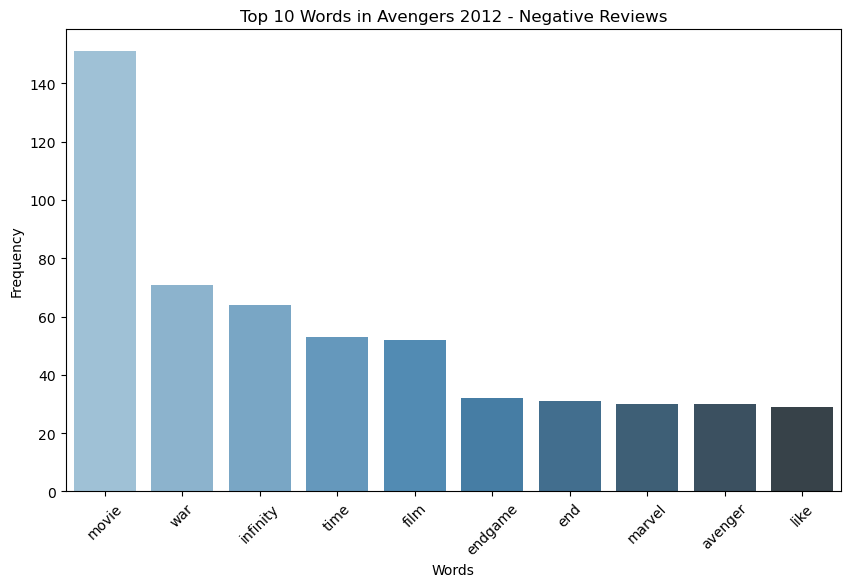

Most common words in Avengers 2012 with Neutral reviews: [('movie', 22), ('end', 20), ('endgame', 12), ('game', 10), ('film', 8), ('avenger', 7), ('man', 7), ('time', 7), ('watch', 6), ('spoiler', 6)]


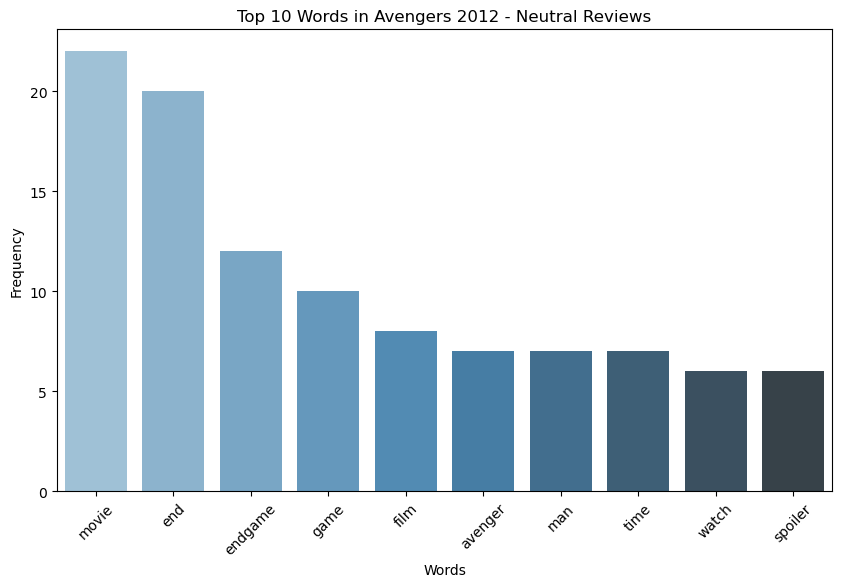

Most common words in Avengers: Age of Ultron with Positive reviews: [('movie', 2737), ('film', 1862), ('avenger', 1745), ('ultron', 1553), ('character', 1297), ('action', 899), ('like', 873), ('marvel', 793), ('time', 735), ('good', 706)]


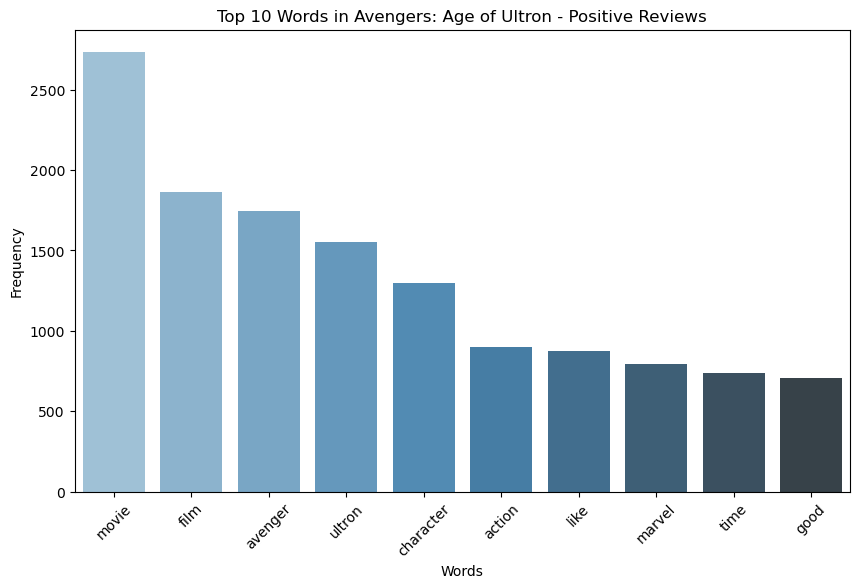

Most common words in Avengers: Age of Ultron with Negative reviews: [('movie', 352), ('avenger', 186), ('film', 174), ('ultron', 156), ('character', 139), ('like', 106), ('action', 87), ('time', 80), ('marvel', 72), ('scene', 70)]


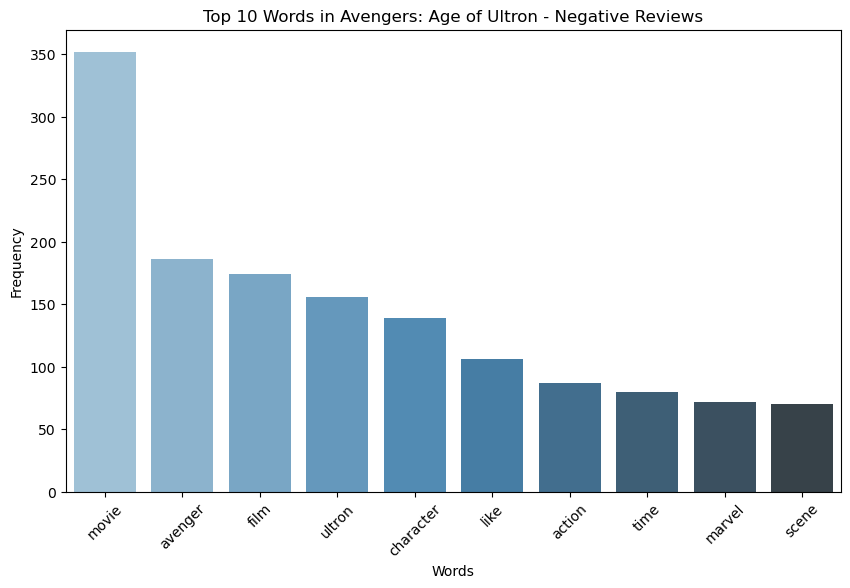

Most common words in Avengers: Age of Ultron with Neutral reviews: [('avenger', 50), ('age', 40), ('ultron', 37), ('movie', 24), ('spoiler', 9), ('review', 8), ('watch', 8), ('action', 7), ('hulk', 6), ('character', 6)]


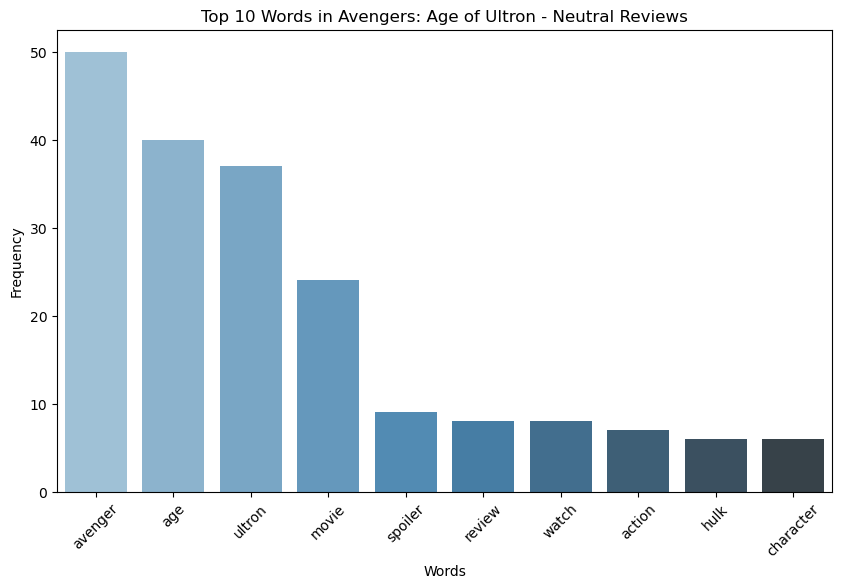

Most common words in Avengers: Infinity War with Positive reviews: [('movie', 2034), ('film', 1042), ('character', 773), ('marvel', 758), ('best', 606), ('thanos', 552), ('avenger', 501), ('infinity', 461), ('war', 452), ('time', 423)]


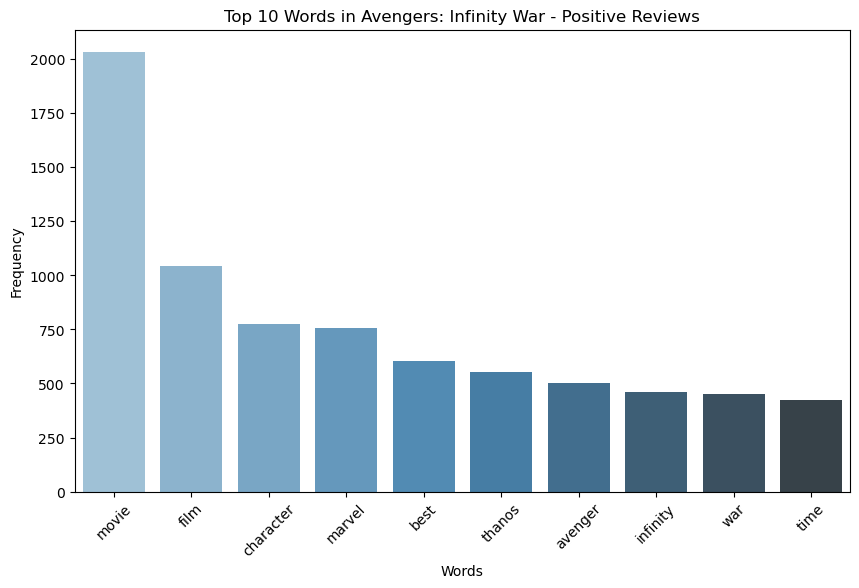

Most common words in Avengers: Infinity War with Negative reviews: [('movie', 216), ('film', 119), ('war', 90), ('infinity', 84), ('character', 75), ('avenger', 67), ('marvel', 60), ('thanos', 53), ('time', 43), ('like', 36)]


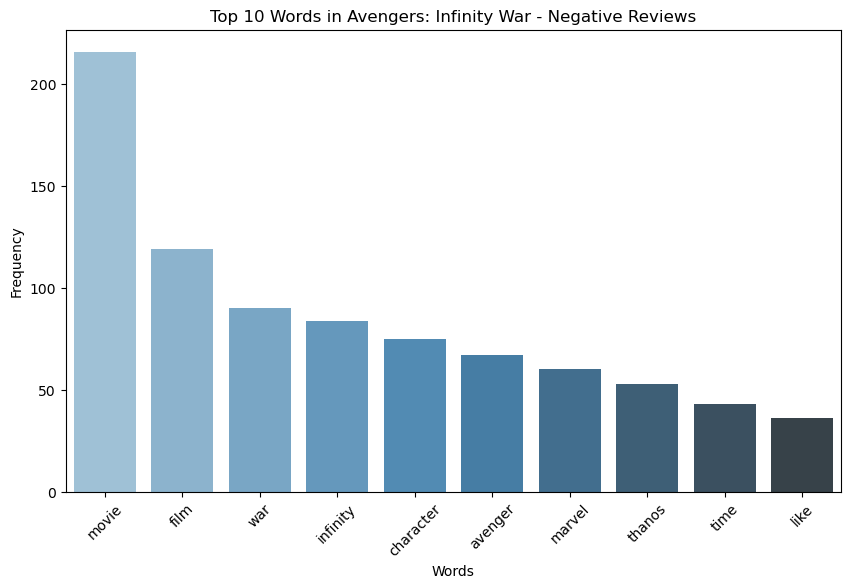

Most common words in Avengers: Infinity War with Neutral reviews: [('movie', 38), ('thanos', 14), ('avenger', 13), ('time', 10), ('infinity', 10), ('film', 9), ('come', 8), ('like', 8), ('character', 7), ('really', 7)]


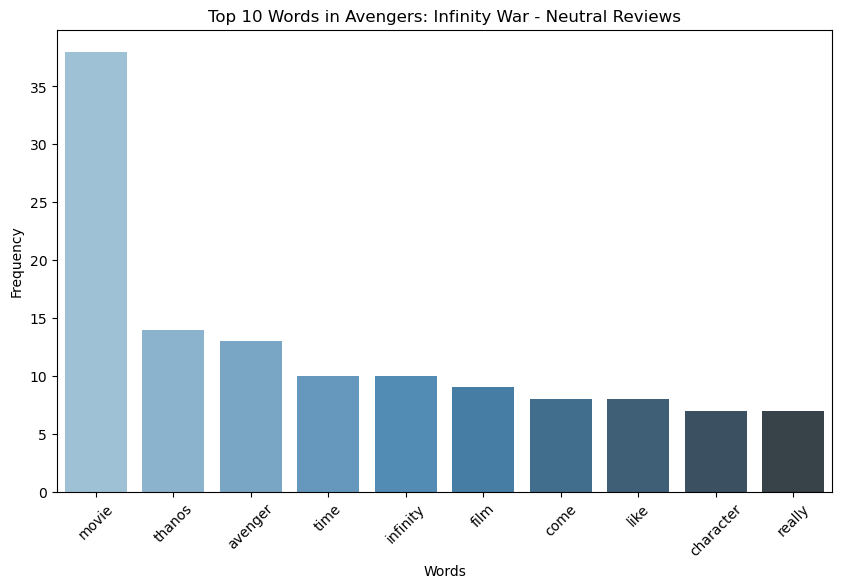

Most common words in Avengers: Endgame with Positive reviews: [('movie', 1599), ('film', 649), ('marvel', 519), ('endgame', 411), ('avenger', 408), ('time', 387), ('character', 340), ('best', 334), ('like', 296), ('infinity', 282)]


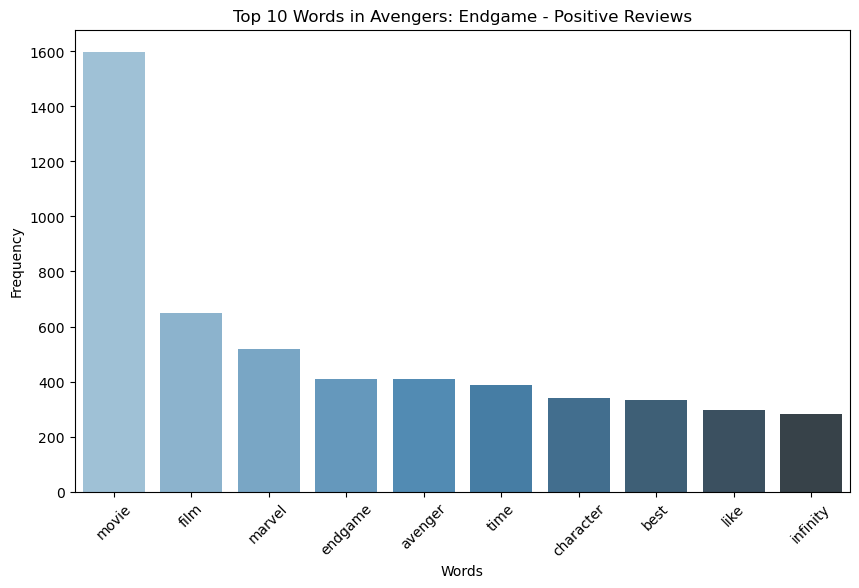

Most common words in Avengers: Endgame with Negative reviews: [('movie', 151), ('war', 71), ('infinity', 64), ('time', 53), ('film', 52), ('endgame', 32), ('end', 31), ('marvel', 30), ('avenger', 30), ('like', 29)]


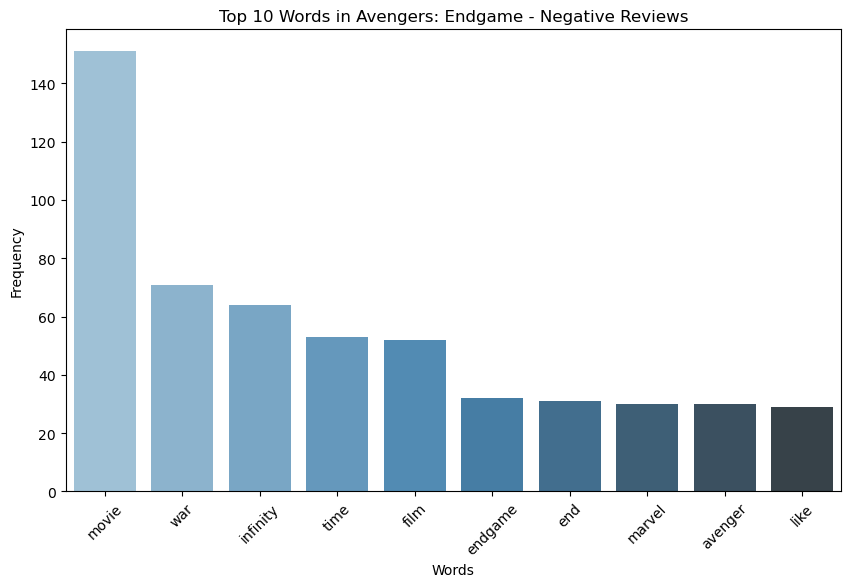

Most common words in Avengers: Endgame with Neutral reviews: [('movie', 22), ('end', 20), ('endgame', 12), ('game', 10), ('film', 8), ('avenger', 7), ('man', 7), ('time', 7), ('watch', 6), ('spoiler', 6)]


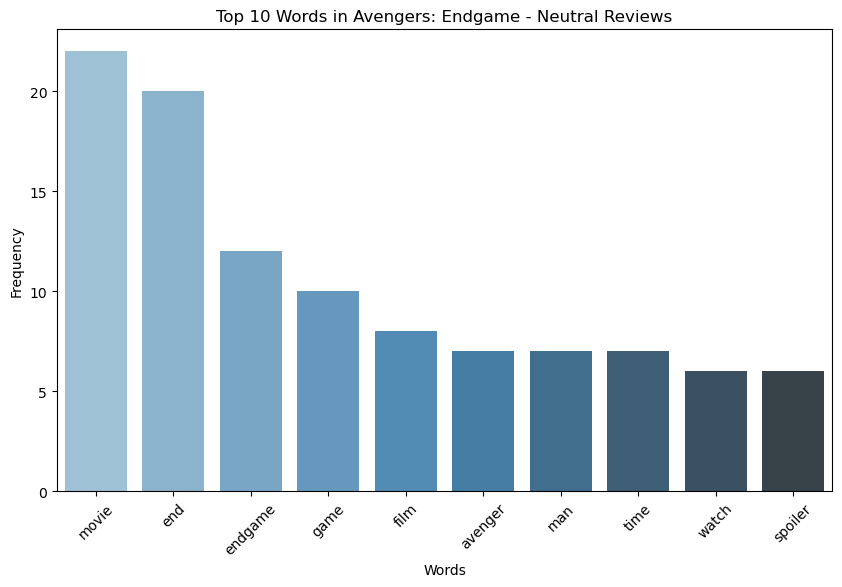

In [88]:
# Function to plot top N words for a given sentiment and movie
def plot_top_words_by_sentiment_and_movie(df, movie_title, sentiment_class, sentiment_label):
    reviews = df[(df['movie'] == movie_title) & (df['sentiment_class_vader'] == sentiment_class)]['content_cleaned']
    common_words = get_top_n_words(reviews, n=10)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    
    print(f"Most common words in {movie_title} with {sentiment_label} reviews:", common_words)

    # Graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Word', y='Frequency', data=words_df, palette='Blues_d')
    plt.title(f'Top 10 Words in {movie_title} - {sentiment_label} Reviews')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# List of movies
movies = Avengers_reviews['movie'].unique()

# Plotting top words for each sentiment by movie
for movie in movies:
    plot_top_words_by_sentiment_and_movie(Avengers_reviews, movie, 'positive', 'Positive')
    plot_top_words_by_sentiment_and_movie(Avengers_reviews, movie, 'negative', 'Negative')
    plot_top_words_by_sentiment_and_movie(Avengers_reviews, movie, 'neutral', 'Neutral')

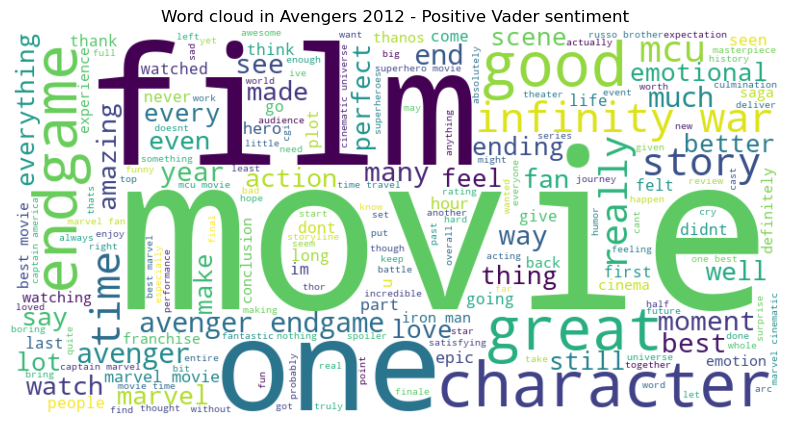

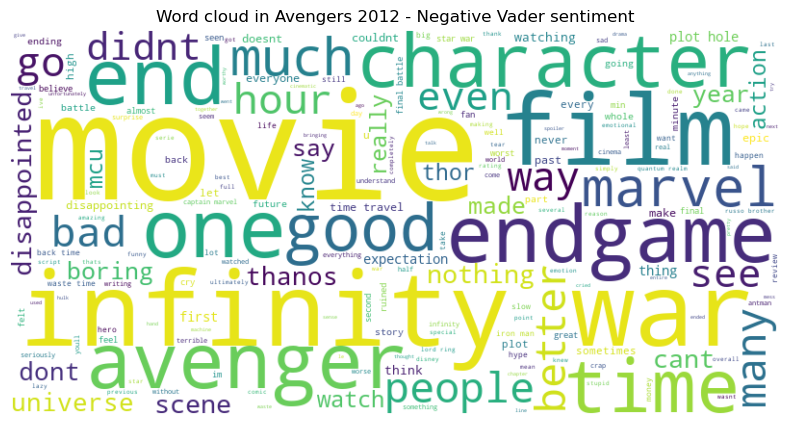

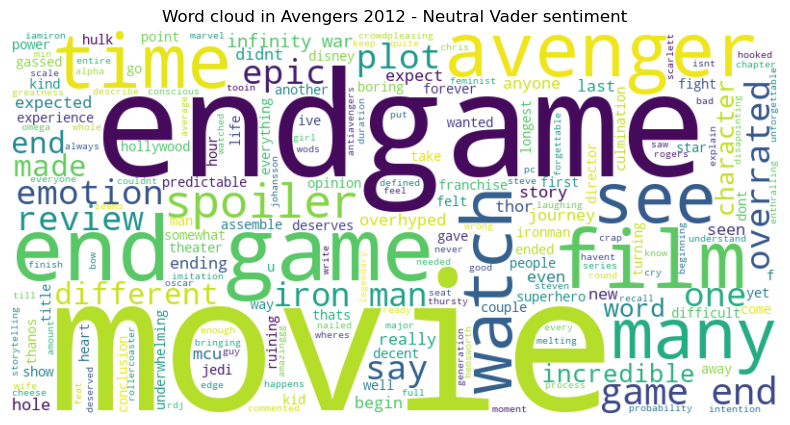

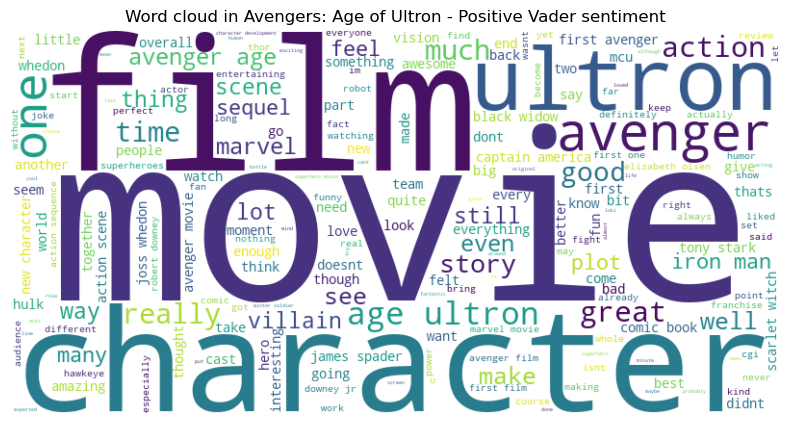

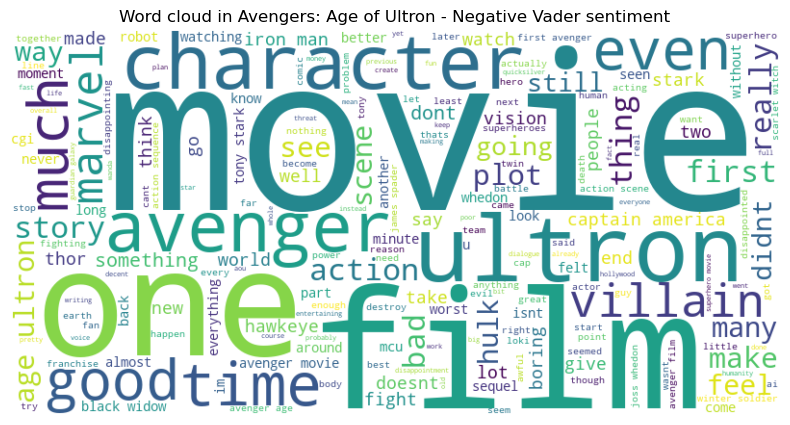

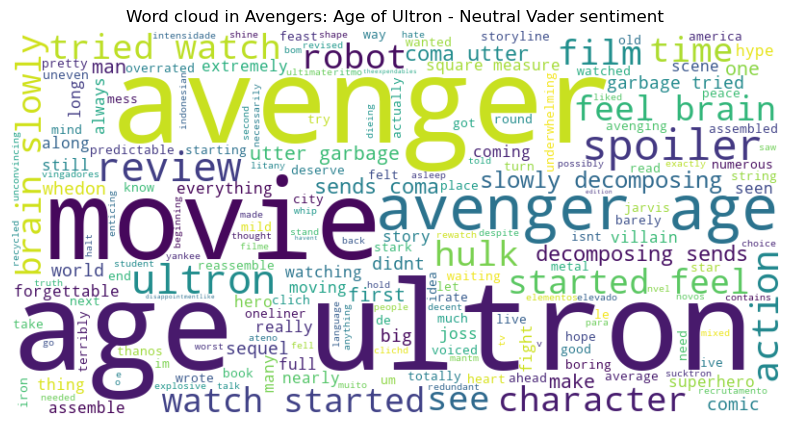

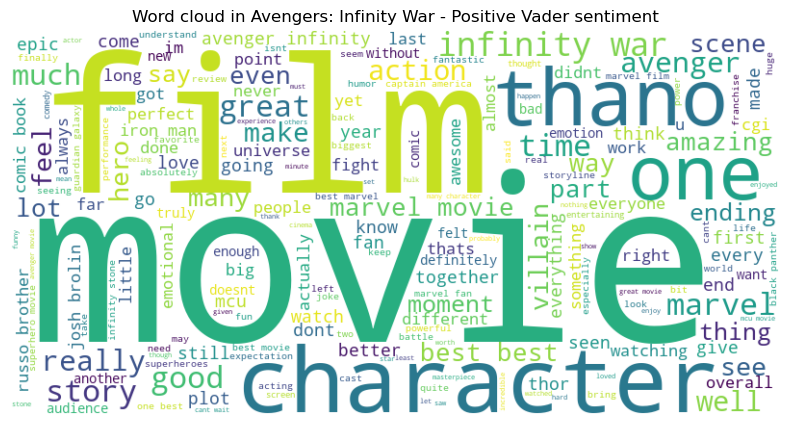

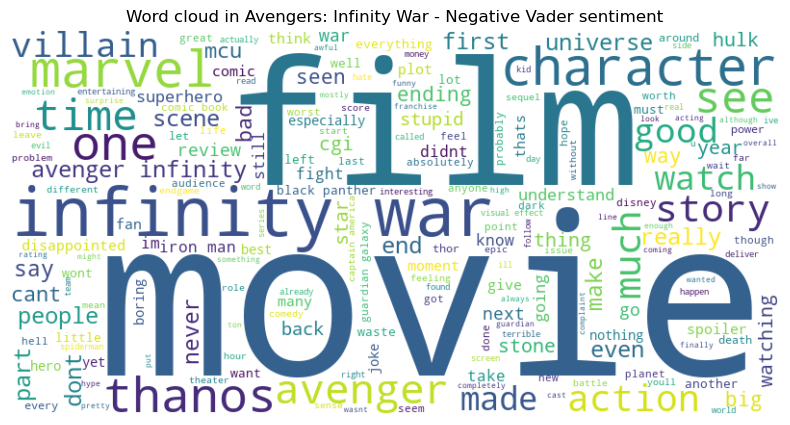

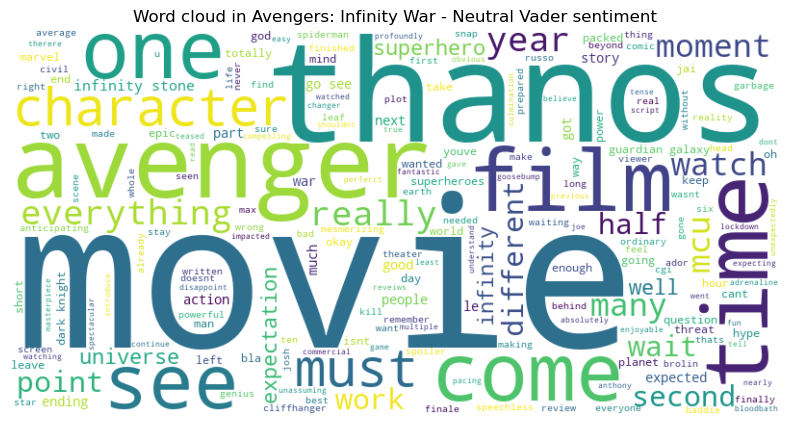

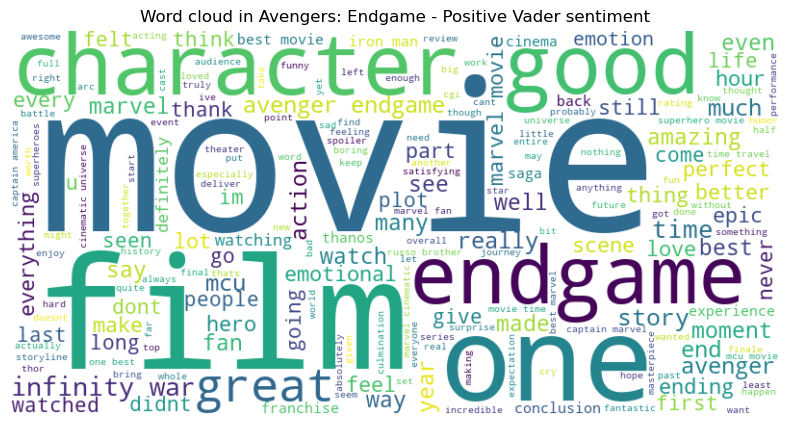

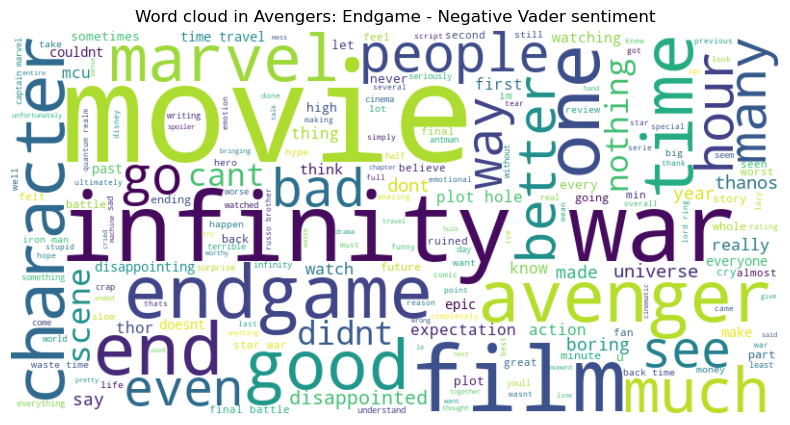

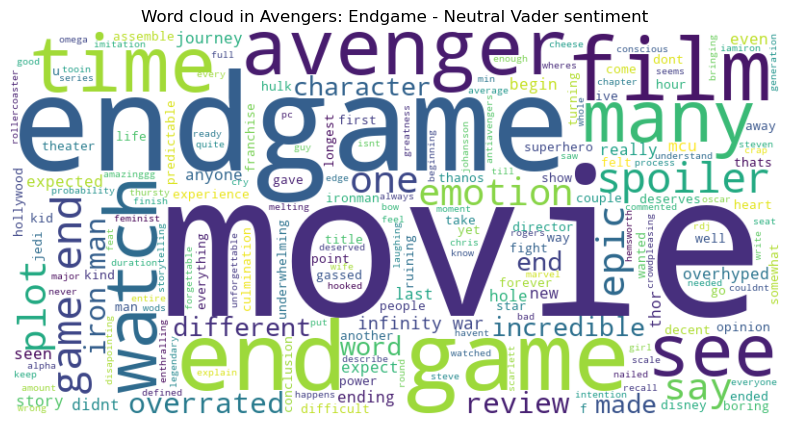

In [89]:
# Function to plot word cloud for a given sentiment and movie
def plot_word_cloud_by_sentiment_and_movie(df, movie_title, sentiment_class, sentiment_label):
    reviews = ' '.join(df[(df['movie'] == movie_title) & (df['sentiment_class_vader'] == sentiment_class)]['content_cleaned'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word cloud in {movie_title} - {sentiment_label} Vader sentiment')
    plt.show()

# List of movies
movies = Avengers_reviews['movie'].unique()

# Plotting word clouds for each sentiment by movie
for movie in movies:
    plot_word_cloud_by_sentiment_and_movie(Avengers_reviews, movie, 'positive', 'Positive')
    plot_word_cloud_by_sentiment_and_movie(Avengers_reviews, movie, 'negative', 'Negative')
    plot_word_cloud_by_sentiment_and_movie(Avengers_reviews, movie, 'neutral', 'Neutral')


# NRCLex
Emotional affects measured include the following:
fear
anger
anticipation
trust
surprise
positive
negative
sadness
disgust
joy

In [91]:
from nrclex import NRCLex
# Función para clasificar emociones usando NRCLex
def classify_emotions(text):
    emotion = NRCLex(text)
    return emotion.top_emotions

# Aplicar la función a la columna de comentarios
Avengers_reviews['emotions'] = Avengers_reviews['content_cleaned'].apply(classify_emotions)

# Extraer todas las emociones en una lista
all_emotions = [emotion for sublist in Avengers_reviews['emotions'] for emotion, score in sublist]

# Filtrar las emociones relevantes y combinar variaciones de emociones
relevant_emotions = ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
combined_emotions = {'anticip': 'anticipation'}
filtered_emotions = [combined_emotions.get(emotion, emotion) for emotion in all_emotions if emotion in relevant_emotions or emotion in combined_emotions]

# Contar las emociones
emotion_counts = Counter(filtered_emotions)

# Convertir a DataFrame para facilitar la visualización y ordenar por la columna 'count' de mayor a menor
emotion_df = pd.DataFrame.from_dict(emotion_counts, orient='index').reset_index()
emotion_df.columns = ['emotion', 'count']
emotion_df = emotion_df.sort_values(by='count', ascending=False)
emotion_df 


emotion  count
1      positive   4199
4      negative   1967
3  anticipation   1844
0         trust   1259
2           joy   1245
7      surprise    995
6         anger    977
5          fear    941
8       sadness    926
9       disgust    836

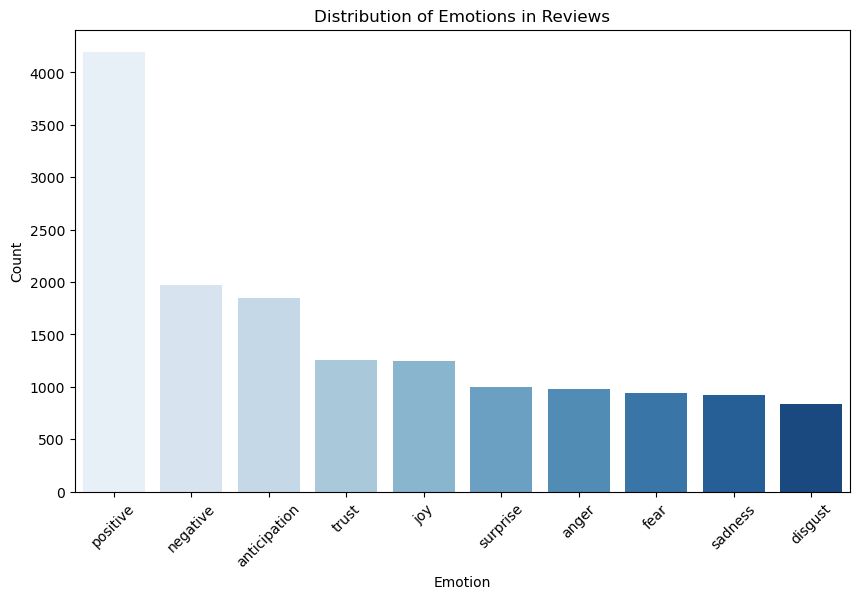

In [92]:
# Graficar las emociones
plt.figure(figsize=(10, 6))
sns.barplot(x='emotion', y='count', data=emotion_df, palette='Blues')
plt.title('Distribution of Emotions in Reviews')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

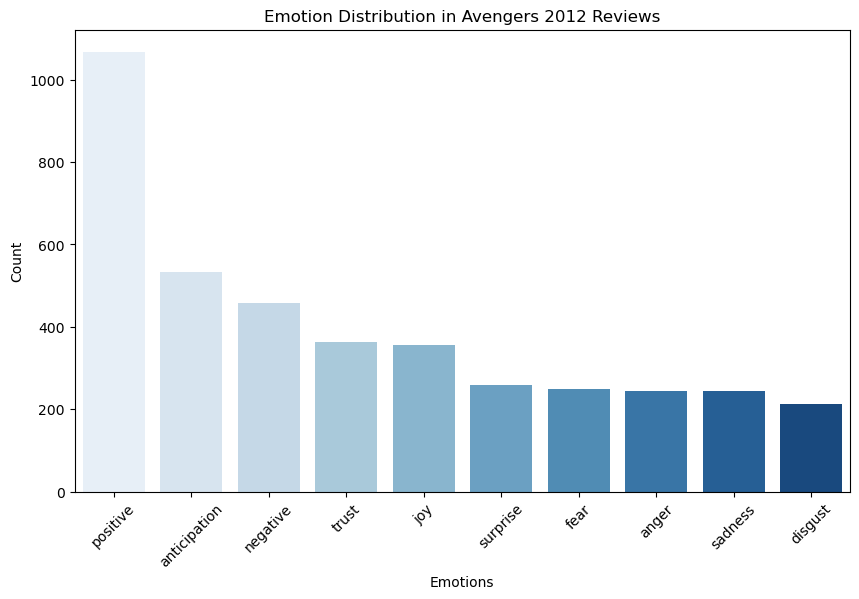

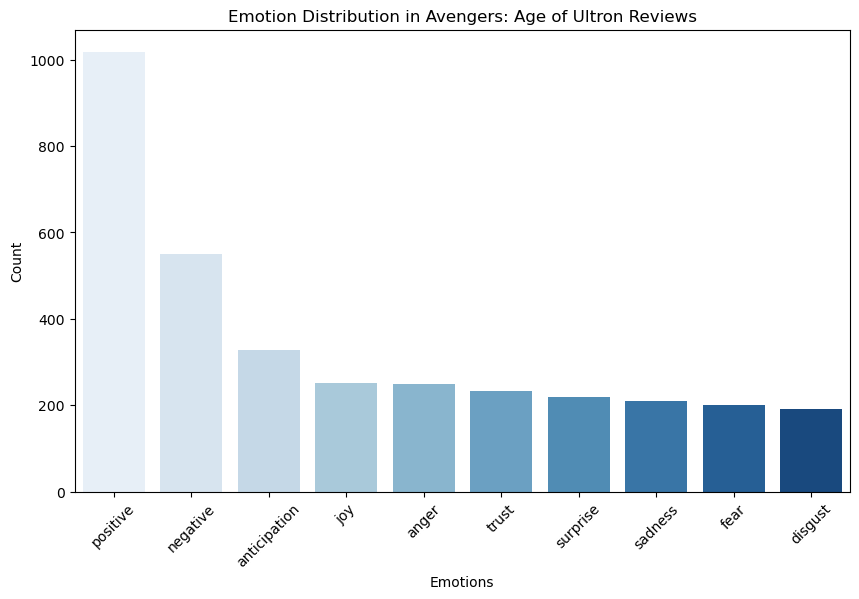

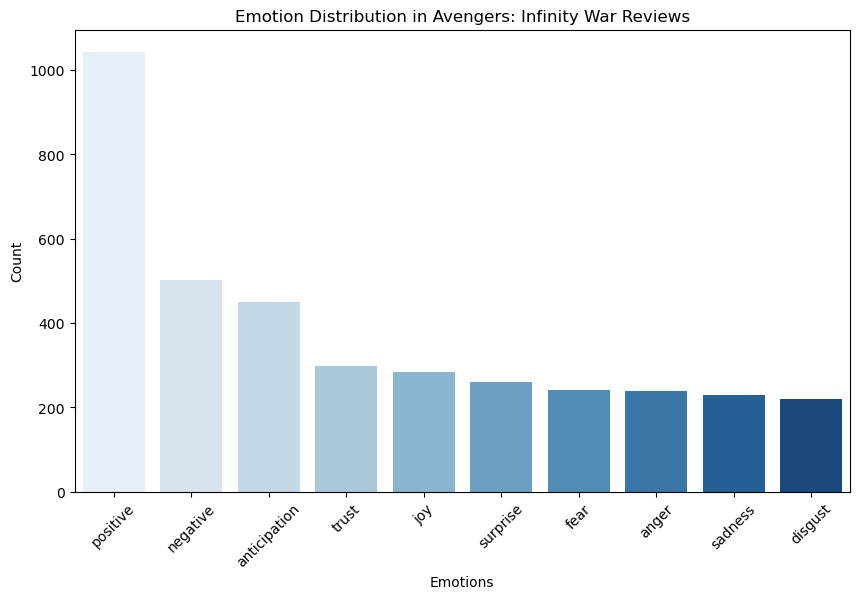

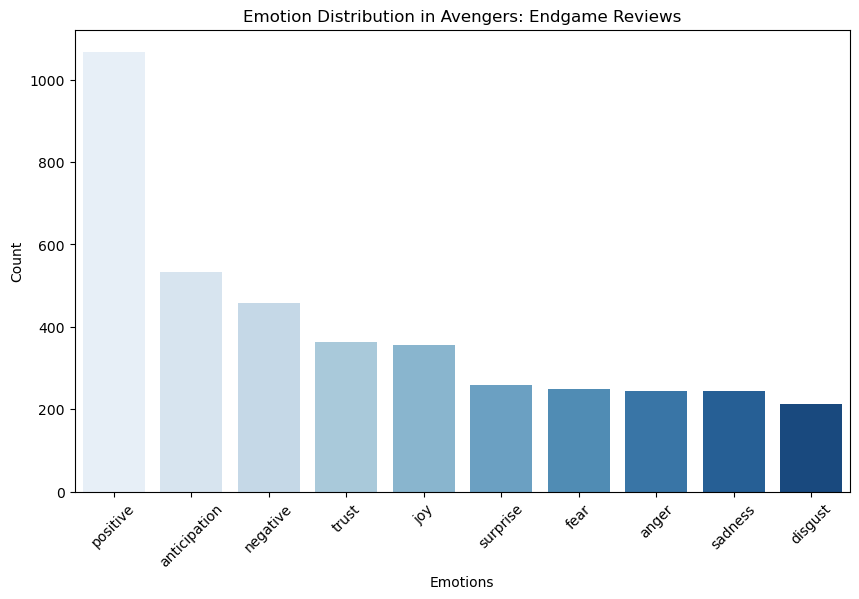

In [93]:
import pandas as pd
from nrclex import NRCLex
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'Avengers_reviews' is your DataFrame

# Function to classify emotions using NRCLex
def classify_emotions(text):
    emotion = NRCLex(text)
    return emotion.top_emotions

# Apply the function to the 'content_cleaned' column
Avengers_reviews['emotions'] = Avengers_reviews['content_cleaned'].apply(classify_emotions)

# Define relevant emotions and combine variations of emotions
relevant_emotions = ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
combined_emotions = {'anticip': 'anticipation'}

# Function to filter and combine emotions
def filter_emotions(emotions):
    return [combined_emotions.get(emotion, emotion) for emotion, score in emotions if emotion in relevant_emotions or emotion in combined_emotions]

# Function to count and plot emotions for each movie
def plot_emotions_for_each_movie(df, title_column, emotion_column):
    unique_movies = df[title_column].unique()
    
    for movie in unique_movies:
        # Filter reviews for the current movie
        movie_reviews = df[df[title_column] == movie]
        
        # Extract all emotions into a list
        all_emotions = [emotion for sublist in movie_reviews[emotion_column] for emotion in filter_emotions(sublist)]
        
        # Count the emotions
        emotion_counts = Counter(all_emotions)
        
        # Convert to DataFrame for easier visualization and sort by 'count'
        emotion_df = pd.DataFrame.from_dict(emotion_counts, orient='index').reset_index()
        emotion_df.columns = ['emotion', 'count']
        emotion_df = emotion_df.sort_values(by='count', ascending=False)
        
        # Plotting the emotions
        plt.figure(figsize=(10, 6))
        sns.barplot(x='emotion', y='count', data=emotion_df, palette='Blues')
        plt.xlabel('Emotions')
        plt.ylabel('Count')
        plt.title(f'Emotion Distribution in {movie} Reviews')
        plt.xticks(rotation=45)
        plt.show()

# Apply the function to the DataFrame
plot_emotions_for_each_movie(Avengers_reviews, 'movie', 'emotions')


In [94]:
# Lets create a diccionary to save all the reviews by emotion
emotion_reviews = {
    'fear': [],
    'anger': [],
    'anticipation': [],
    'trust': [],
    'surprise': [],
    'positive': [],
    'negative': [],
    'sadness': [],
    'disgust': [],
    'joy': []
}

# Asign to ech review, its emotion
for index, row in Avengers_reviews.iterrows():
    for emotion, score in row['emotions']:
        if emotion in emotion_reviews:
            emotion_reviews[emotion].append(row['content_cleaned'])

# Counting
top_words_by_emotion = {}

for emotion, reviews in emotion_reviews.items():
    if reviews:
        top_words_by_emotion[emotion] = get_top_n_words(reviews, 10)
    else:
        top_words_by_emotion[emotion] = []

# Converting to df
df_top_words_by_emotion = {emotion: pd.DataFrame(words, columns=['word', 'count']) for emotion, words in top_words_by_emotion.items()}

# Print
for emotion, df in df_top_words_by_emotion.items():
    print(f"\nTop 10 palabras en reseñas con emoción {emotion}:\n", df)


Top 10 palabras en reseñas con emoción fear:
       word  count
0    movie    340
1     best    287
2    watch     99
3    great     87
4     film     75
5   better     66
6  amazing     54
7      war     50
8      end     49
9     like     43

Top 10 palabras en reseñas con emoción anger:
       word  count
0    movie    340
1     best    287
2  avenger    169
3    great     77
4     film     73
5      end     66
6   better     58
7  amazing     56
8  endgame     49
9     like     48

Top 10 palabras en reseñas con emoción anticipation:
        word  count
0     movie   1175
1      time    453
2      good    341
3      film    304
4     watch    265
5      best    228
6     great    189
7  infinity    183
8   avenger    167
9       war    165

Top 10 palabras en reseñas con emoción trust:
        word  count
0     movie    520
1      best    327
2      good    182
3     great    131
4      film    130
5       end    104
6    better     98
7  infinity     97
8   amazing     77
9      

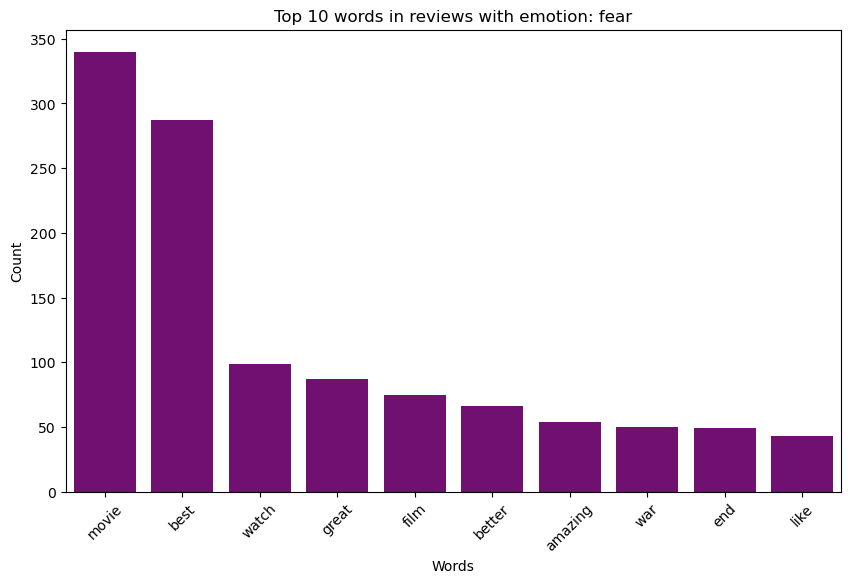

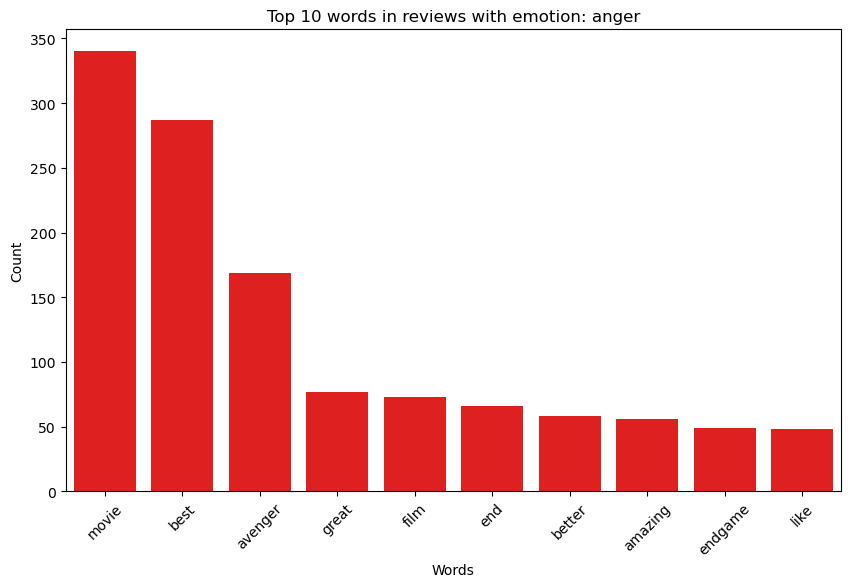

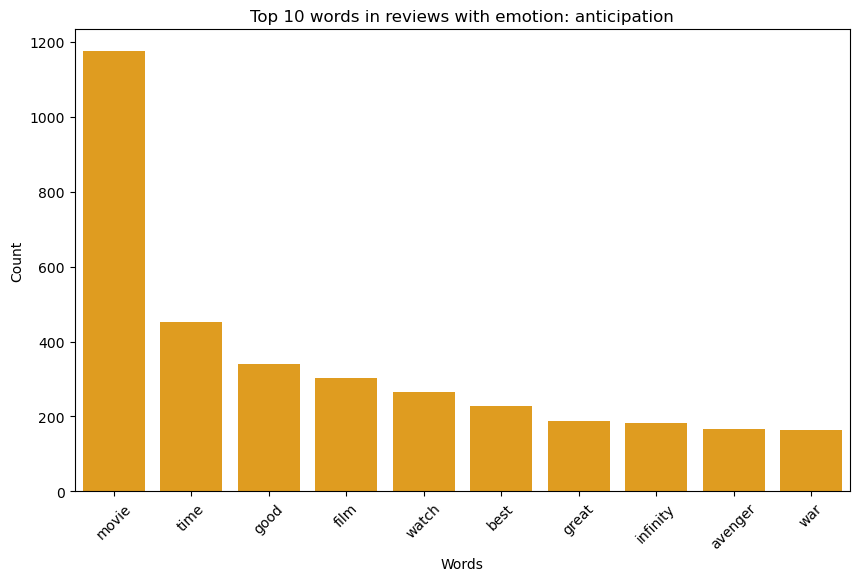

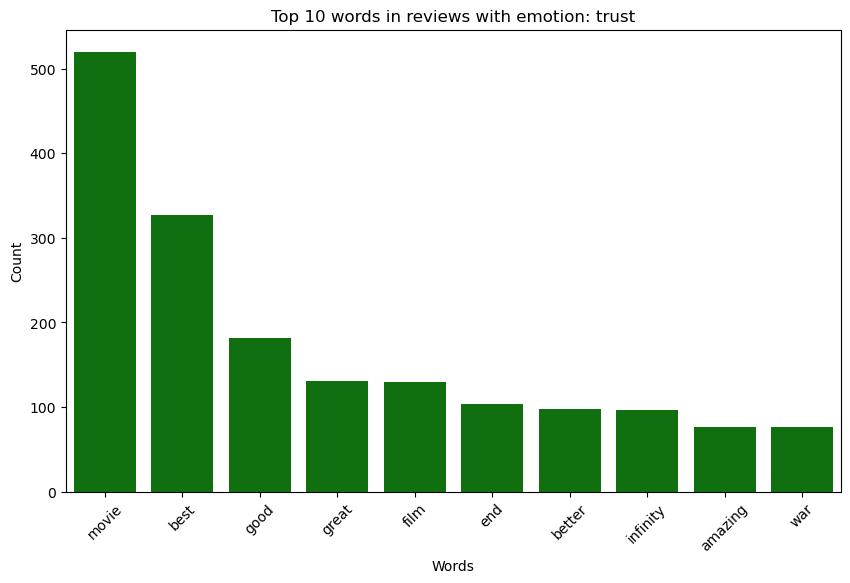

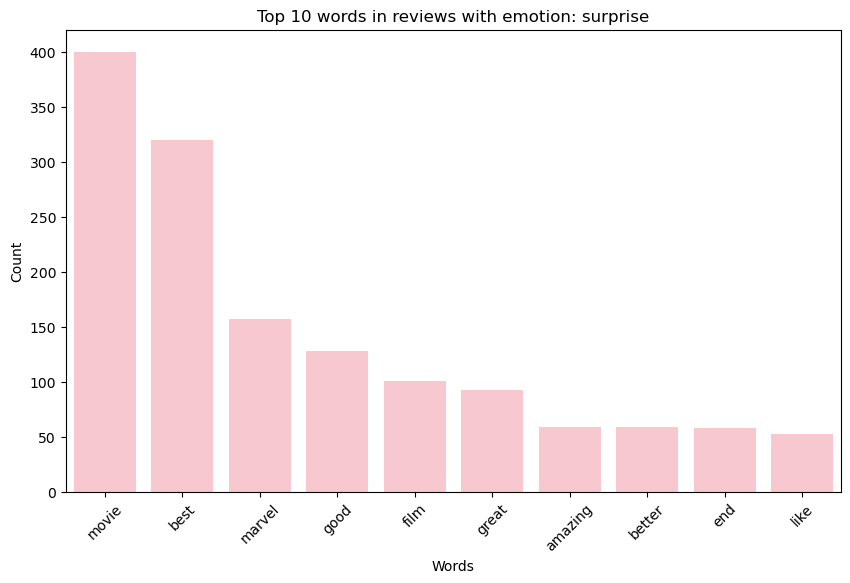

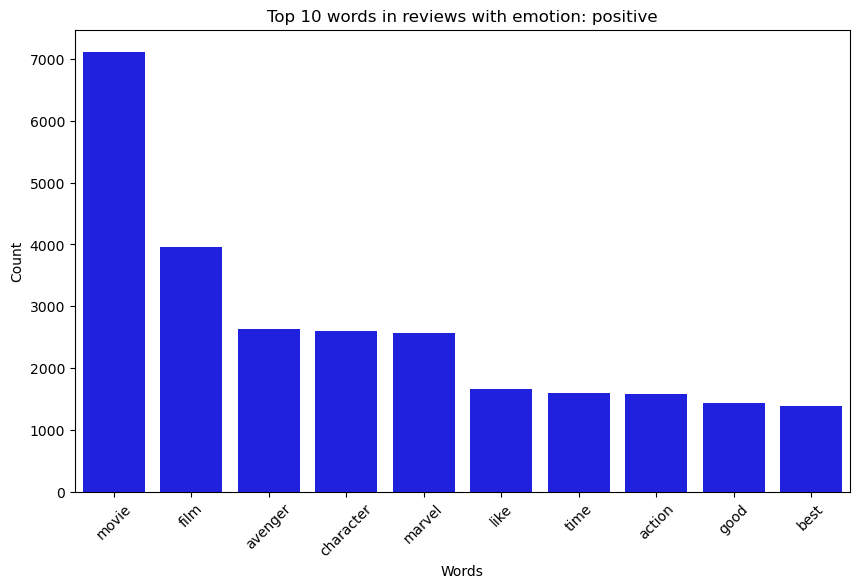

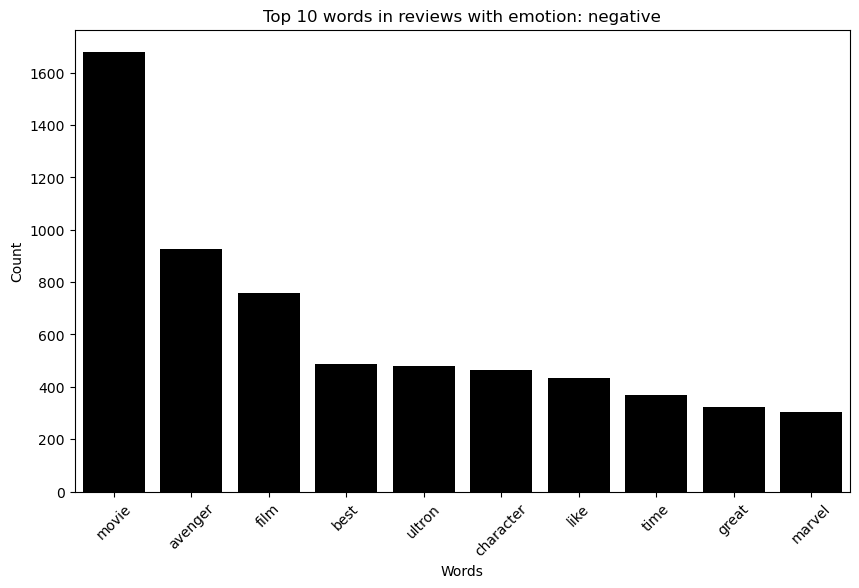

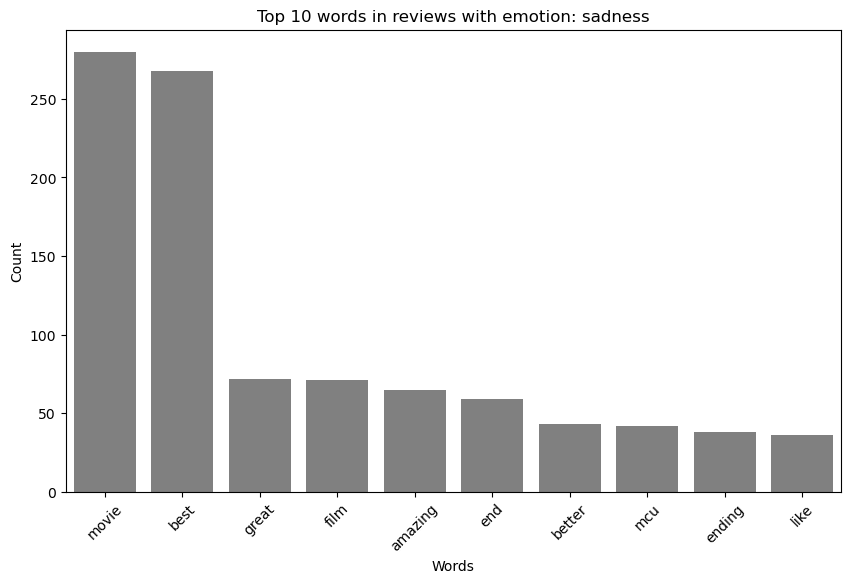

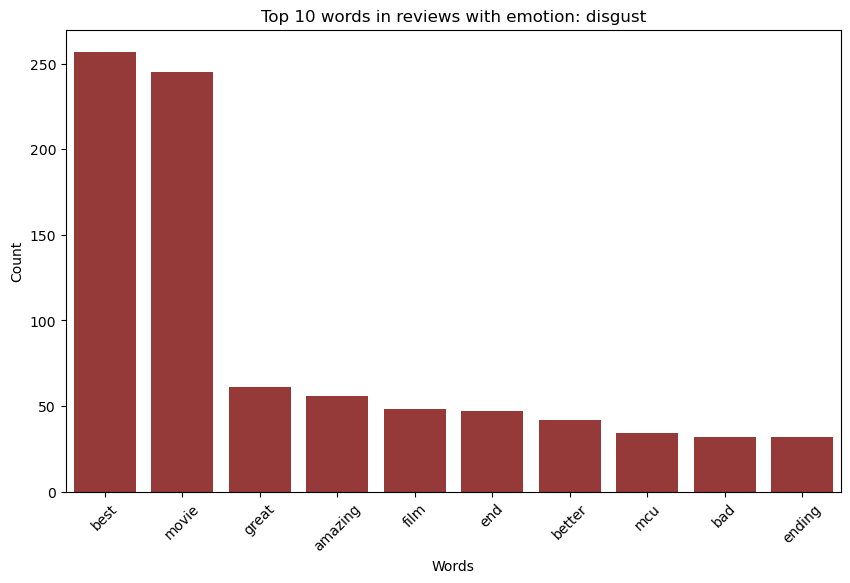

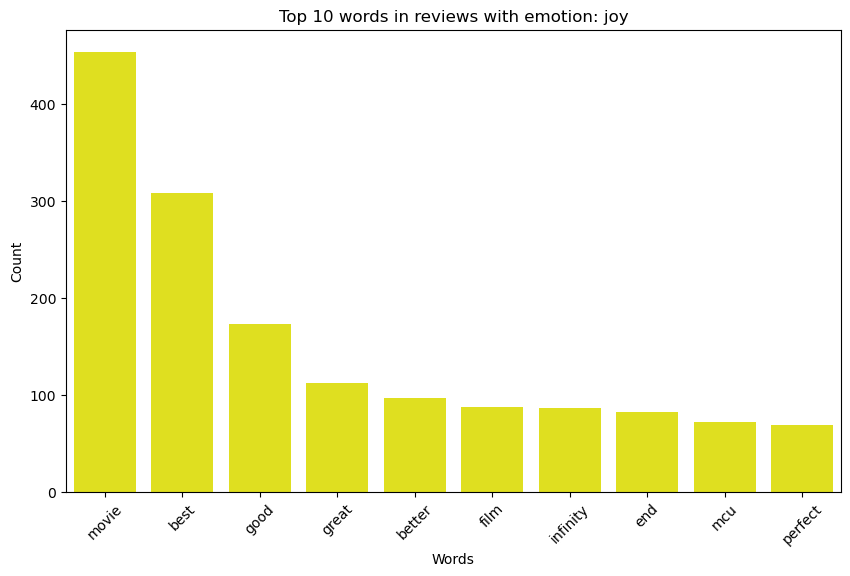

In [95]:
emotion_colors = {
    'fear': 'purple',
    'anger': 'red',
    'anticipation': 'orange',
    'trust': 'green',
    'surprise': 'pink',
    'positive': 'blue',
    'negative': 'black',
    'sadness': 'gray',
    'disgust': 'brown',
    'joy': 'yellow'
}

# Graph
for emotion, df in df_top_words_by_emotion.items():
    if not df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='word', y='count', data=df, palette=[emotion_colors[emotion]]*len(df))
        plt.title(f'Top 10 words in reviews with emotion: {emotion}')
        plt.xlabel('Words')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


Now we are going to check how different words related can be found in a emotion

In [97]:
# Defining the key words ofr the topics
curiosity_list = ['post credit', 'easter egg', 'curious', 'eager', 'wait']
acting_list = ['actor', 'performance', 'acting', 'cast', 'role']
visual_list = ['visual', 'effects', 'CGI', 'graphics', 'animation']


topics = {
    'curiosity': curiosity_list,
    'acting': acting_list,
    'visual': visual_list
}


emotion_reviews = {
    'fear': [],
    'anger': [],
    'anticipation': [],
    'trust': [],
    'surprise': [],
    'positive': [],
    'negative': [],
    'sadness': [],
    'disgust': [],
    'joy': []
}

# Asigning each review, its emortion
for index, row in Avengers_reviews.iterrows():
    for emotion, score in row['emotions']:
        if emotion in emotion_reviews:
            emotion_reviews[emotion].append(row['content_cleaned'])

# Counting
def count_keywords(corpus, keywords):
    vec = CountVectorizer(vocabulary=keywords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq

# Counting key words for each topic and emotion
keywords_by_emotion = {}

for emotion, reviews in emotion_reviews.items():
    keywords_by_emotion[emotion] = {}
    for topic, keywords in topics.items():
        if reviews:
            keywords_by_emotion[emotion][topic] = count_keywords(reviews, keywords)
        else:
            keywords_by_emotion[emotion][topic] = []

# Printing
for emotion, topics in keywords_by_emotion.items():
    print(f"\nEmoción: {emotion}")
    for topic, keywords in topics.items():
        print(f"  Tema: {topic}")
        for word, count in keywords:
            print(f"    {word}: {count}")


C:\Users\dayan\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:1364: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(



Emoción: fear
  Tema: curiosity
    wait: 1
    post credit: 0
    easter egg: 0
    curious: 0
    eager: 0
  Tema: acting
    acting: 4
    performance: 3
    role: 2
    actor: 1
    cast: 0
  Tema: visual
    visual: 1
    effects: 0
    CGI: 0
    graphics: 0
    animation: 0

Emoción: anger
  Tema: curiosity
    curious: 1
    wait: 1
    post credit: 0
    easter egg: 0
    eager: 0
  Tema: acting
    performance: 5
    acting: 4
    cast: 2
    actor: 0
    role: 0
  Tema: visual
    visual: 2
    effects: 0
    CGI: 0
    graphics: 0
    animation: 0

Emoción: anticipation
  Tema: curiosity
    wait: 76
    eager: 1
    post credit: 0
    easter egg: 0
    curious: 0
  Tema: acting
    acting: 23
    cast: 17
    actor: 14
    performance: 9
    role: 7
  Tema: visual
    visual: 4
    effects: 0
    CGI: 0
    graphics: 0
    animation: 0

Emoción: trust
  Tema: curiosity
    wait: 4
    post credit: 0
    easter egg: 0
    curious: 0
    eager: 0
  Tema: acting
    acting: 